In [9]:
set.seed(1)
X1 = rnorm(1000)
X2 = rnorm(1000)
Y = 1 + X1 + 2*X2 + rnorm(1000,0,5)
X3 = X1 + rnorm(1000,0,1)
df = as.data.frame(cbind(Y,X1,X2,X3))
fm1 = lm(data = df, Y ~ 1 + X1)
summary(fm1)
fm2 = lm(data = df, Y ~ 1 + X1 + X2)
summary(fm2)
fm3 = lm(data = df, Y ~ X1 + X2 + X3)
summary(fm3)


Call:
lm(formula = Y ~ 1 + X1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.622  -3.487   0.039   3.736  15.045 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0470     0.1771   5.913  4.6e-09 ***
X1            1.2588     0.1712   7.354  4.0e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.599 on 998 degrees of freedom
Multiple R-squared:  0.05141,	Adjusted R-squared:  0.05046 
F-statistic: 54.09 on 1 and 998 DF,  p-value: 3.996e-13



Call:
lm(formula = Y ~ 1 + X1 + X2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0753  -3.2822  -0.1117   3.4074  14.0659 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0812     0.1630   6.634 5.36e-11 ***
X1            1.2452     0.1575   7.904 7.11e-15 ***
X2            2.1101     0.1568  13.459  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.153 on 997 degrees of freedom
Multiple R-squared:  0.1973,	Adjusted R-squared:  0.1957 
F-statistic: 122.5 on 2 and 997 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ X1 + X2 + X3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0633  -3.2721  -0.1024   3.4229  14.0297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08041    0.16308   6.625 5.68e-11 ***
X1           1.19859    0.22516   5.323 1.26e-07 ***
X2           2.10938    0.15686  13.447  < 2e-16 ***
X3           0.04558    0.15710   0.290    0.772    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.156 on 996 degrees of freedom
Multiple R-squared:  0.1973,	Adjusted R-squared:  0.1949 
F-statistic: 81.62 on 3 and 996 DF,  p-value: < 2.2e-16


1.

  a)

   $Y = 1 + X1 + 2*X2 + \epsilon$ where $\epsilon$ is normally distributed with variance of 5 and mean of 0. 

   b)
   For our population model, all assumptions are met.
  
   For model fm1, Assumption A2, that all covariates are present in the model is violated.
   For model fm3, the same assumption is also violated.

   c)

   I agree with the logic for why the standard error is likely to be large for the first model, and also why it will decrease for the second model, it is correct to say that X2 will explain more of the variation, thus making X1 more accurate. The data from the regression shows this. However, it is incorrect to predict that it will decrease even further for model 3, as X3 is highly correlated to X1, and when highly correlated variables are added in a regression, it does not necessarily explain any further variance. The data shows this too, with the std error for X1 increasing with model 3. 
   

3. 

a) Given both distributions are normal, the test statistic will have a normal distribution. If the means are equal, the distribution will have a mean of 0. The variance of each sample mean is $\sigma^2/n$, and the variance of their difference is $2\sigma^2/n$. Given the difference of the means is divided by the root of the variance/standard deviation, this standardises the distribution and gives it a variance of 1. When the means are not equal, the mean of the distribution will be the observed difference between the two sample means, divided by the standard error. The variance will remain at 1.

b) The p-value for an observed test statistic of t, would be the probability of the absolute value of a N(0,1) random variable being greater than the absolute value of t. We use an absolute value as it is a two-tailed hypothesis test - it only matters if the means are different, not which one is larger. The p-value is the probability that this t-statistic value was observed by chance, given we assume the null hypothesis to be true. 

In [34]:
# simulation running code 
sigma <- 0.6
reps <- 100000
set.seed(1)  # Set seed for reproducibility

run_simulation <- function(n, mu1, mu2, are_means_diff) {
    
    alpha_values <- c(0.01, 0.05, 0.1)
    # Initialize vectors to store T values and p-values
    T_values <- numeric(reps)
    p_values <- numeric(reps)
    mean_differences <- numeric(reps)
    
    # Simulation loop
    for (i in 1:reps) {
      # Generate X and Y
      X <- rnorm(n, mean = mu1, sd = sigma)
      Y <- rnorm(n, mean = mu2, sd = sigma)
      
      # Compute test statistic T
      T <- (mean(X) - mean(Y)) / sqrt(2 * sigma^2 / n)
      T_values[i] <- T
      
      # Compute p-value for two-tailed test
      p_values[i] <- 2 * (1 - pnorm(abs(T)))
      mean_differences[i] <- mean(X) - mean(Y)

    }
    
    # Plot histograms of T values and p-values
    par(mfrow = c(1, 2))  # Create side-by-side plots
    
    # Histogram of T values
    hist(T_values, breaks = 50, main = "Histogram of T Values", xlab = "T", col = "skyblue", border = "white")
    
    # Histogram of p-values
    hist(p_values, breaks = 50, main = "Histogram of p-values", xlab = "p-value", col = "salmon", border = "white")
    
    # Calculate rejection rates for each alpha
    rejection_rates <- sapply(alpha_values, function(alpha) {
      mean(p_values < alpha)
    })
    
    # Display results
    cat("Rejection rates for different significance levels:\n")
    for (i in 1:length(alpha_values)) {
      cat(sprintf("Alpha = %.2f: Rejection rate = %.5f\n", alpha_values[i], rejection_rates[i]))
    }

    if (are_means_diff) {
        rejections <- p_values < 0.05
        rejection_rate <- mean(rejections)
        # Average magnitude of |X̄ - Ȳ| for rejected test statistics
        avg_magnitude_rejected <- mean(abs(mean_differences[rejections]))
        
        # Fraction of rejected test statistics where X̄ < Ȳ
        fraction_wrong_sign <- mean((mean_differences[rejections]) < 0)
        cat("Rejection rate (Power of the test):", rejection_rate, "\n")
        cat("Average magnitude of |X̄ - Ȳ| for rejected tests:", avg_magnitude_rejected, "\n")
        cat("Fraction of rejected test statistics with wrong sign:", fraction_wrong_sign, "\n")
    }

}


Rejection rates for different significance levels:
Alpha = 0.01: Rejection rate = 0.01075
Alpha = 0.05: Rejection rate = 0.05062
Alpha = 0.10: Rejection rate = 0.10076


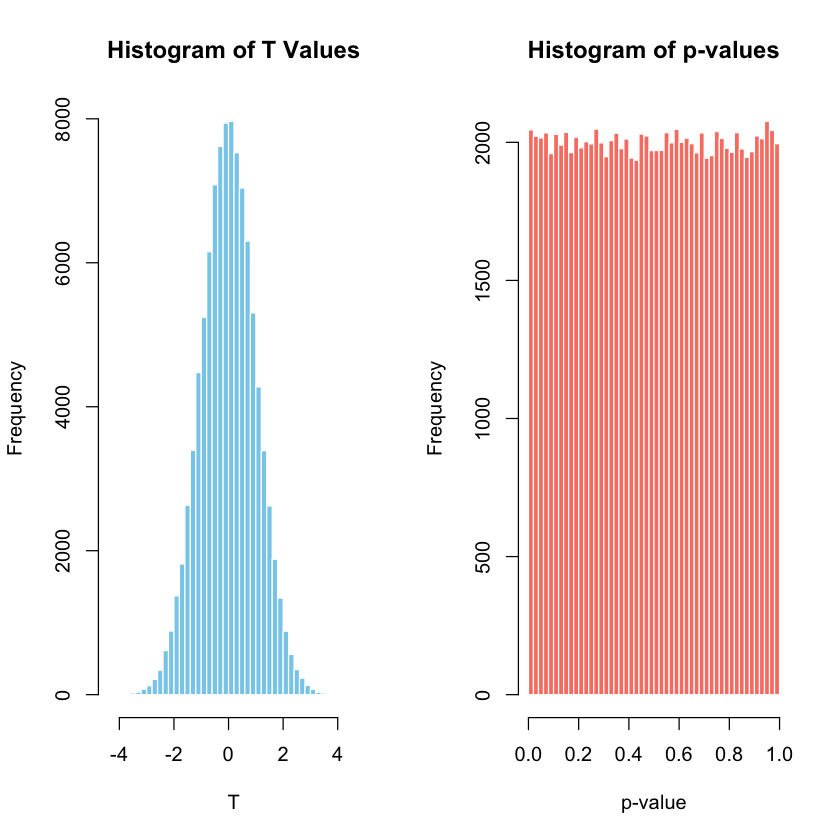

In [41]:
# 3. c) 
mu1 <- 3
mu2 <- 3
n <- 50
set.seed(1)  # Set seed for reproducibility
run_simulation(n, mu1, mu2, FALSE)

We see a normal distribution shape for the t-statistic as expected, and it appears to have mean of around 0, and variance of around 1. The histogram for the p-values shows an uniform distribution, also as expected, as each value of the t-statistic is equally likely to occur under the null hypothesis.

As the alpha value decreases, as expected, the number of simulations under which we reject the null hypothesis also decrease, from 10,076 under 0.1 alpha to just 1075 under alpha of 0.01.

Rejection rates for different significance levels:
Alpha = 0.01: Rejection rate = 0.01030
Alpha = 0.05: Rejection rate = 0.05054
Alpha = 0.10: Rejection rate = 0.10152


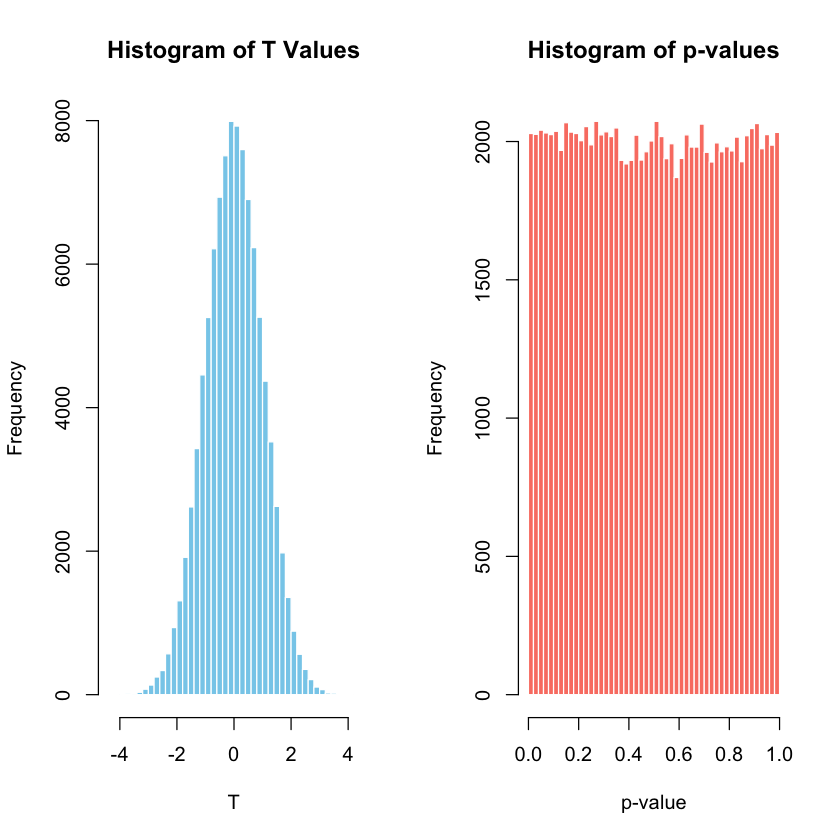

In [29]:
# 3. d) 
mu1 <- 3
mu2 <- 3
n <- 1000
set.seed(1)  # Set seed for reproducibility
run_simulation(n, mu1, mu2, FALSE)

There are no significant changes in the shape of the histograms, they remain a normal distribution for the t-statistic and an uniform distribution of our p-values. 
The fraction of samples rejected under each alpha doesn't change significantly either, both are not affected by increasing our sample size.


Rejection rates for different significance levels:
Alpha = 0.01: Rejection rate = 0.94375
Alpha = 0.05: Rejection rate = 0.98587
Alpha = 0.10: Rejection rate = 0.99393
Rejection rate (Power of the test): 0.98587 
Average magnitude of |X̄ - Ȳ| for rejected tests: 0.504197 
Fraction of rejected test statistics with wrong sign: 0 


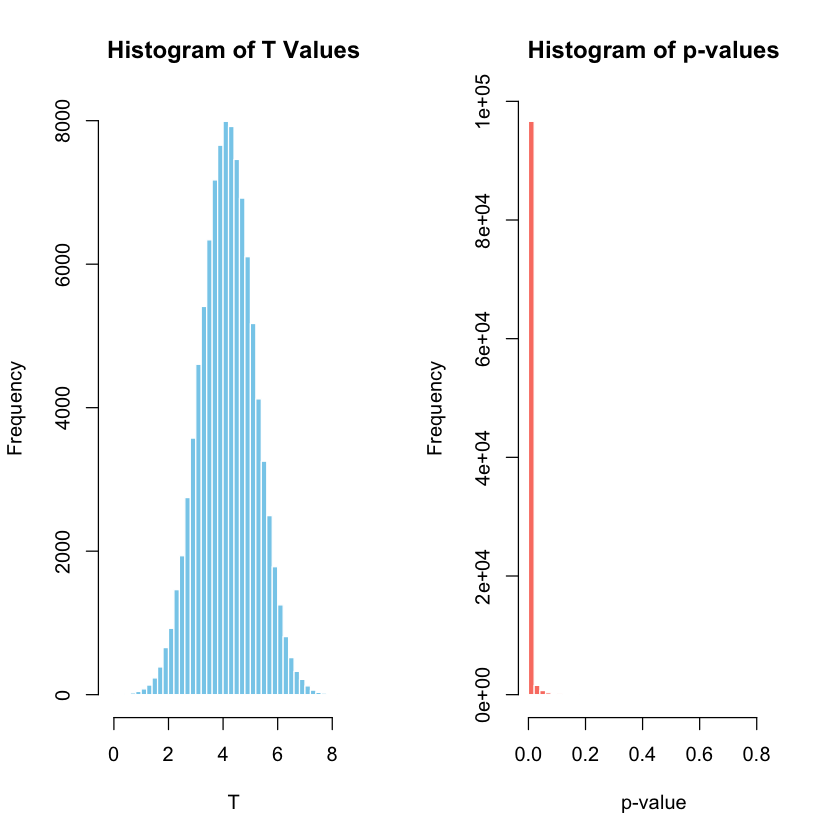

In [36]:
#  3. e) 
mu1 <- 3.5
mu2 <- 3
n <- 50
set.seed(1)  # Set seed for reproducibility
run_simulation(n, mu1, mu2, TRUE)

Rejection rates for different significance levels:
Alpha = 0.01: Rejection rate = 0.01717
Alpha = 0.05: Rejection rate = 0.07069
Alpha = 0.10: Rejection rate = 0.13023
Rejection rate (Power of the test): 0.07069 
Average magnitude of |X̄ - Ȳ| for rejected tests: 0.286315 
Fraction of rejected test statistics with wrong sign: 0.1243457 


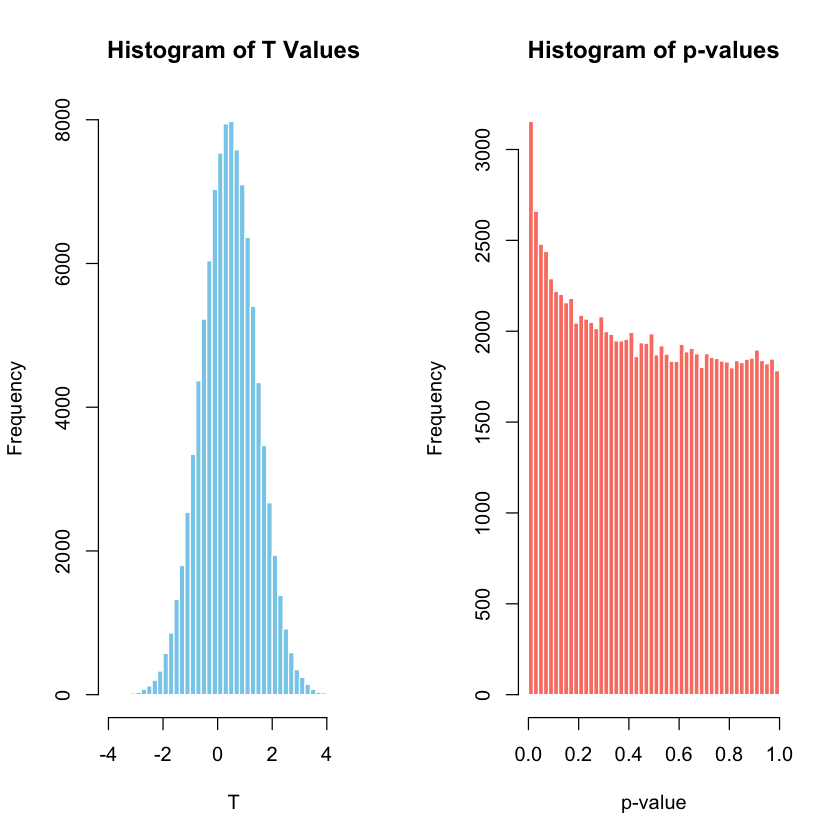

In [37]:
#  3. f) 
mu1 <- 3.05
mu2 <- 3
n <- 50
set.seed(1)  # Set seed for reproducibility
run_simulation(n, mu1, mu2, TRUE)

The differences when the means differ by just 0.05 (well within the standard deviation of 0.6), is clear, we reject the null hypothesis in only ~7% of the cases as opposed to ~98%, and our average magnitude of these cases is 0.29, as opposed to being close to the actual difference of 0.05.  We also have 12% of the rejected cases with the wrong sign, indicating due to randomness, we're predicting mu1 to be lower than mu2 when in reality mu1 is larger. The smaller difference means it is harder to make an accurate inference using this method, and harder to reject the null hypothesis. 

3. g)
   
The probability of not rejecting the null hypothesis in one state is 95% as seen from our first simulation when the means are equal, under alpha of 0.05. Therefore the probability of not rejecting the null hypothesis for all states is 0.95^50, or 7.69%. The probability therefore of rejecting the null hypothesis in at least one state is 92.31%.

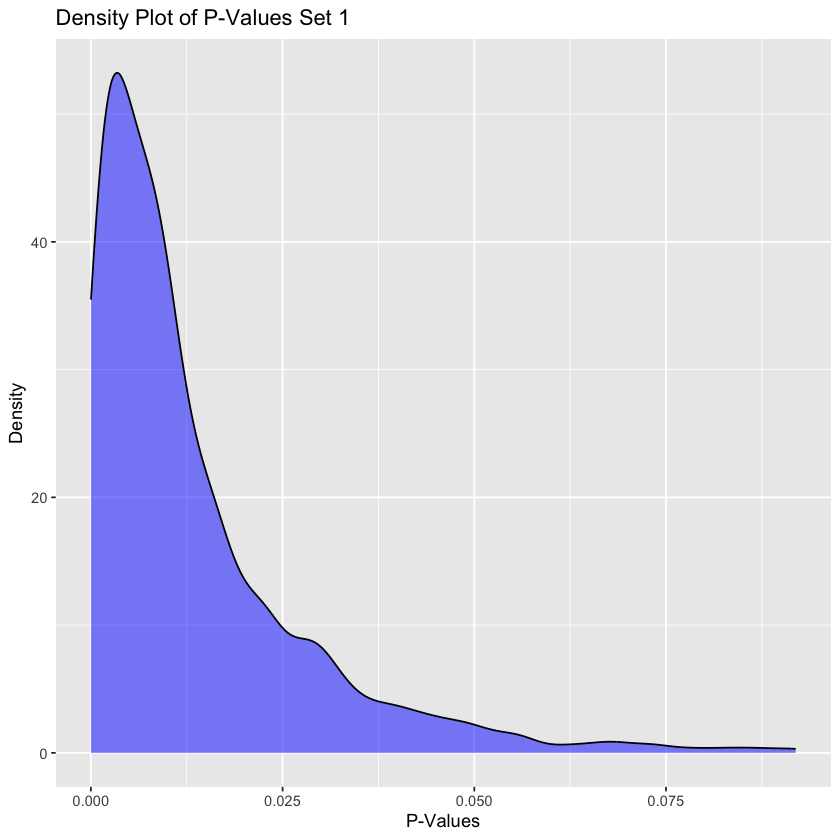

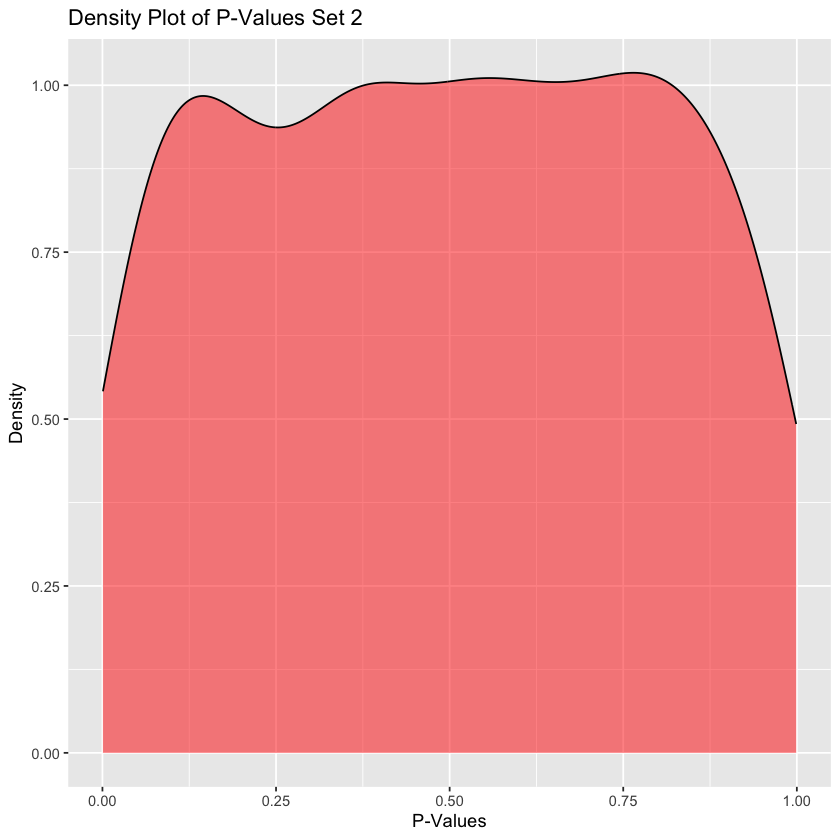

In [53]:
# 4 a) 

# Parameters
n <- 100               # Number of observations
p <- 50                # Number of covariates
reps <- 1000           # Number of simulations
sigma <- 1             # Standard deviation of Normal(0, 1)

# Initialize vectors to store p-values
p_values_step3 <- numeric()
p_values_step4 <- numeric()

# Simulation
set.seed(1)  # Set seed for reproducibility
for (sim in 1:reps) {
  # Step (i): Generate data
  Y <- rnorm(n, mean = 0, sd = sigma)  # Generate Y
  X <- matrix(rnorm(n * p, mean = 0, sd = sigma), nrow = n, ncol = p)  # Generate X
  
  # Step (ii): Fit Lasso without intercept
  lasso_fit <- glmnet(X, Y, alpha = 1, intercept = FALSE)
  nonzero_counts <- colSums(as.matrix(lasso_fit$beta) != 0)
  
  # Find the smallest lambda where exactly one nonzero coefficient remains
  one_nonzero_idx <- which(nonzero_counts == 1)
  if (length(one_nonzero_idx) == 0) next  # Skip if no valid lambda
  
  selected_lambda <- lasso_fit$lambda[one_nonzero_idx[1]]
  selected_covariate_idx <- which(as.matrix(lasso_fit$beta[, one_nonzero_idx[1]]) != 0)
  
  # Step (iii): Fit OLS with the selected covariate and record p-value
  selected_covariate <- X[, selected_covariate_idx]
  ols_model <- lm(Y ~ selected_covariate + 0)  # OLS without intercept
  p_value <- summary(ols_model)$coefficients[4]  # Extract p-value
  p_values_step3 <- c(p_values_step3, p_value)
  
  # Step (iv): Generate new data and fit OLS
  Y_new <- rnorm(n, mean = 0, sd = sigma)
  X_new <- matrix(rnorm(n * p, mean = 0, sd = sigma), nrow = n, ncol = p)
  new_covariate <- X_new[, selected_covariate_idx]
  ols_model_new <- lm(Y_new ~ new_covariate + 0)
  p_value_new <- summary(ols_model_new)$coefficients[4]
  p_values_step4 <- c(p_values_step4, p_value_new)
}

# Density plots of p-values
par(mfrow = c(1, 2))  # Create side-by-side plots

p_values_data1 <- data.frame(p_value = p_values_step3)
ggplot(p_values_data1, aes(x = p_value)) + 
  geom_density(fill = 'blue', alpha=0.5) + 
  ggtitle('Density Plot of P-Values Set 1') + 
  xlab('P-Values') + ylab('Density')

p_values_data2 <- data.frame(p_value = p_values_step4)
ggplot(p_values_data2, aes(x = p_value)) + 
  geom_density(fill = 'red', alpha=0.5) + 
  ggtitle('Density Plot of P-Values Set 2') + 
  xlab('P-Values') + ylab('Density')

4. b)

The p-values for OLS with a lasso-selected coefficient on the same data cluster around ~0.01, and has a tail towards 0.10. Whereas for OLS on that coefficient with new data, the p-values form a roughly uniform distribution between 0.1 and 0.9, with less density towards the extremes. 

This shows how using Lasso to select a coefficient helps select the statistically significant variable on the data it is given, taking advantage of randomness, and resulting in selection bias. However, that does not necessarily generalise, using that same covariate on a new set of data does not guarantee a strong p-value. Therefore when using Lasso to select covariates for OLS to run inference, we need to be careful as a strong (low) p-value does not indicate inference, if both processes are run on the same dataset. 